# PA2 - Structure from Motion
---
- 20204102 Juhyeon Nam (AI Graduate School)

In [1]:
import os
DATASET_dir = os.path.join(os.getcwd(),'data_2_sfm')
DATASET_dir

'/home/njh/Desktop/CV2020/PA2/data_2_sfm'

In [2]:
import cv2
cv2.__version__

'4.4.0'

## Correspondence Search, Relating Images
---
1. Extract SIFT from every image and find putative matches
2. Reject outliers by RANSAC

### 1. Extract SIFT from every image and find putative matches

Since this step is same as the task 1 from PA1, I modified the `alignImages()` function from the PA1 with SIFT descriptor.

Also, I referenced the code from [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html)

In [3]:
import matplotlib.pyplot as plt

GOOD_MATCH_PERCENT = 0.7

def SIFT_feature_matching(im1, im2):
    
    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    
    # Detect SIFT features and compute descriptors
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = sift.detectAndCompute(im2Gray, None)
    
    # Match features
    matcher  = cv2.BFMatcher()
    matches = matcher.knnMatch(descriptors1, descriptors2, k=2)
    
    # Drop bad matches
    good_matches = []
    for m, n in matches:
        if m.distance < GOOD_MATCH_PERCENT*n.distance:
            good_matches.append([m])

    # Draw top matches
    imMatches = cv2.drawMatchesKnn(im1, keypoints1, im2, keypoints2, good_matches, None)
    cv2.imwrite("matches.jpg", imMatches)
    
    plt.figure(figsize=(16,8))
    plt.suptitle('Feature matching')
    plt.imshow(cv2.cvtColor(imMatches, cv2.COLOR_BGR2RGB))
    
    return keypoints1, keypoints2, good_matches

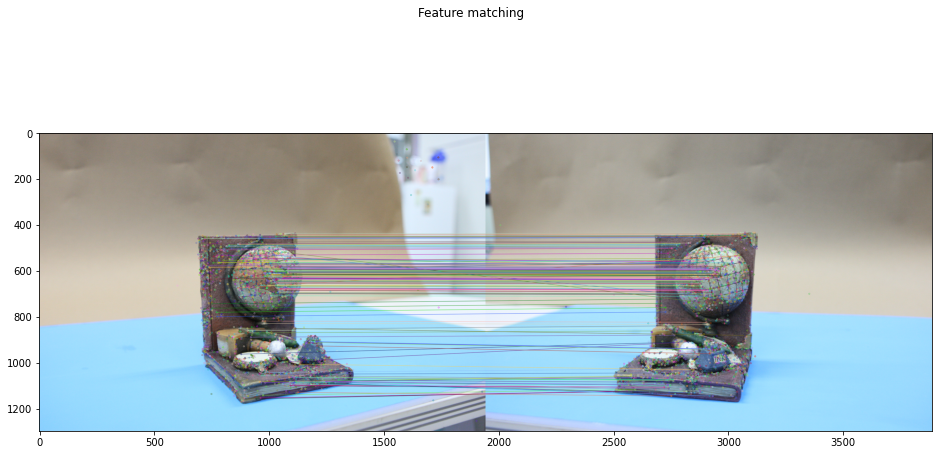

In [4]:
img1 = cv2.imread(os.path.join(DATASET_dir, 'sfm01.JPG'), cv2.IMREAD_COLOR)
img2 = cv2.imread(os.path.join(DATASET_dir, 'sfm02.JPG'), cv2.IMREAD_COLOR)

keypoints1, keypoints2, good_matches = SIFT_feature_matching(img1, img2)

### 2. Estimating essential matrix with RANSAC

In [9]:
# keypoints1[good_matches[0][0].queryIdx].pt
# keypoints2[good_matches[0][0].imgIdx].pt

import matlab.engine

ModuleNotFoundError: No module named 'matlab.engine'; 'matlab' is not a package

## Initialization Step
---
3. Estimate motion (R and T)
4. Reconstruct 3D points for the selected image pair(Triangulation)